In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../input/netflix-shows/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [5]:
df.shape

(8807, 12)

In [6]:
movie_df = df[df['type']=='Movie']

In [7]:
movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
groupby_df = df.groupby(['type'])

In [9]:
groupby_df.size()

type
Movie      6131
TV Show    2676
dtype: int64

In [10]:
series_by_type = groupby_df.size()
df.shape[0] - (5943+230)

2634

In [11]:
series_by_type.values

array([6131, 2676])

<BarContainer object of 2 artists>

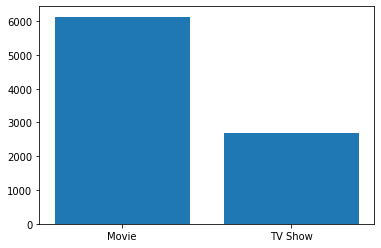

In [12]:
plt.bar(series_by_type.index,series_by_type.values)

In [13]:
country_series = df['country']

In [14]:
country_series.dropna(inplace=True)

In [15]:
country_series

0                                           United States
1                                            South Africa
4                                                   India
7       United States, Ghana, Burkina Faso, United Kin...
8                                          United Kingdom
                              ...                        
8801                         United Arab Emirates, Jordan
8802                                        United States
8804                                        United States
8805                                        United States
8806                                                India
Name: country, Length: 7976, dtype: object

In [16]:
country_series.unique()
#group_country = country_series.group_by()

array(['United States', 'South Africa', 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kingdom,

In [17]:
country_series.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [18]:
new_country_series = pd.Series()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [19]:
new_country_series

Series([], dtype: float64)

In [20]:
l = []
for i in country_series:
    countries = [country.strip() for country in i.split(',')]
    for country in countries:
        l.append(country)
        

In [21]:
new_country_series = pd.Series(l)

In [22]:
new_country_series.value_counts()

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Length: 123, dtype: int64

In [23]:
count_country_series = new_country_series.value_counts()

In [24]:
count_country_series

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Length: 123, dtype: int64

In [25]:
count_country_series.sort_values(ascending=False)

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Sudan                1
Panama               1
Uganda               1
East Germany         1
Montenegro           1
Length: 123, dtype: int64

In [26]:
top_5_countries = count_country_series.sort_values(ascending=False)[:5]

In [27]:
top_5_countries = top_5_countries.sort_values()
top_5_countries

France             393
Canada             445
United Kingdom     806
India             1046
United States     3690
dtype: int64

<BarContainer object of 5 artists>

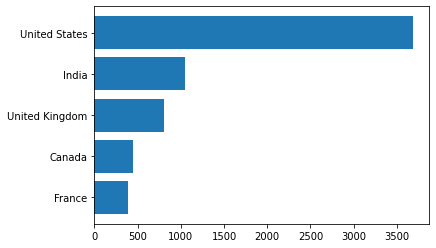

In [28]:
plt.barh(top_5_countries.index,top_5_countries.values)

In [29]:
temp = df.groupby(['type'])

In [30]:
type(temp)

pandas.core.groupby.generic.DataFrameGroupBy

In [31]:
df_list=[]
for temp_df in temp:
    df_list.append(temp_df)

In [32]:
df_list[0][1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [33]:
duration_series = df_list[0][1]['duration']

In [34]:
duration_series.dropna(inplace=True)

In [35]:
duration_array = duration_series.values
duration_array

array(['90 min', '91 min', '125 min', ..., '88 min', '88 min', '111 min'],
      dtype=object)

In [36]:
int_duration = [int(str(x).split(" ")[0]) for x in duration_array]

In [37]:
int_duration

[90,
 91,
 125,
 104,
 127,
 91,
 67,
 94,
 161,
 61,
 166,
 147,
 103,
 97,
 106,
 111,
 110,
 105,
 96,
 124,
 116,
 98,
 91,
 23,
 115,
 122,
 99,
 99,
 88,
 100,
 102,
 93,
 96,
 95,
 85,
 97,
 95,
 83,
 103,
 113,
 13,
 182,
 106,
 48,
 145,
 145,
 93,
 106,
 147,
 87,
 96,
 95,
 92,
 91,
 90,
 97,
 80,
 117,
 128,
 90,
 119,
 110,
 143,
 119,
 114,
 94,
 106,
 99,
 118,
 115,
 95,
 115,
 108,
 63,
 117,
 121,
 142,
 113,
 154,
 95,
 108,
 120,
 100,
 82,
 124,
 114,
 104,
 94,
 94,
 93,
 97,
 109,
 88,
 101,
 105,
 102,
 101,
 103,
 106,
 118,
 86,
 121,
 229,
 76,
 95,
 98,
 89,
 120,
 110,
 83,
 121,
 105,
 94,
 156,
 112,
 95,
 107,
 114,
 129,
 86,
 97,
 125,
 107,
 127,
 128,
 92,
 135,
 124,
 136,
 165,
 124,
 136,
 150,
 112,
 119,
 133,
 142,
 93,
 113,
 124,
 116,
 106,
 145,
 93,
 95,
 108,
 90,
 86,
 92,
 82,
 70,
 122,
 122,
 122,
 122,
 84,
 96,
 115,
 110,
 88,
 102,
 91,
 105,
 135,
 86,
 140,
 133,
 92,
 82,
 97,
 78,
 94,
 121,
 97,
 110,
 64,
 59,
 101,
 127,
 9

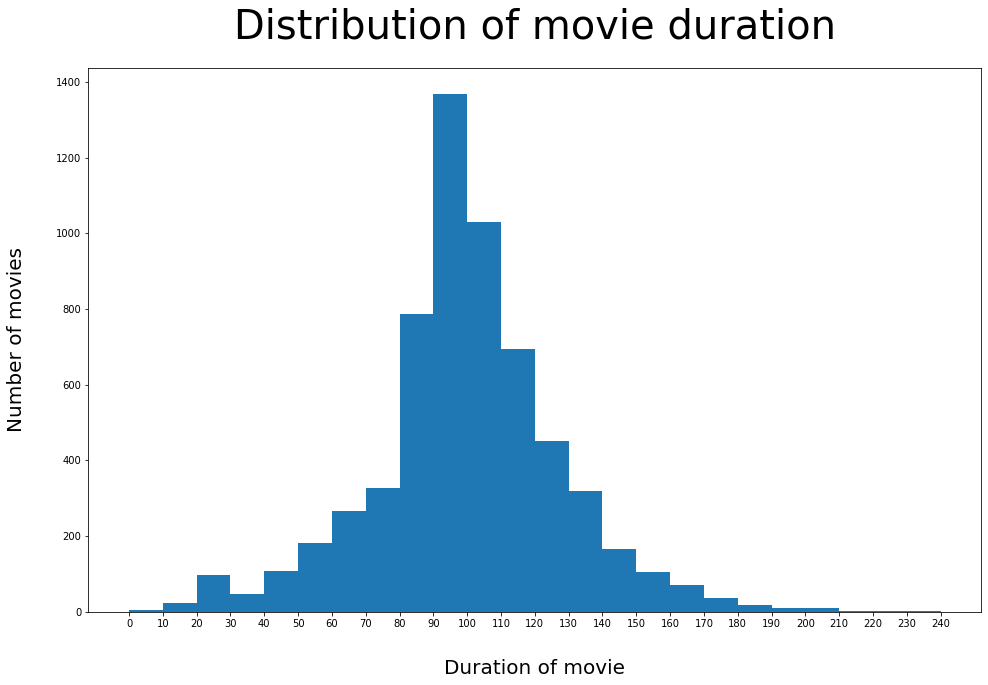

In [38]:
plt.figure(figsize=(16,10))

plt.hist(int_duration,bins =[x for x in range(0,250,10)])
plt.xticks(ticks = [x for x in range(0,250,10)],labels = [x for x in range(0,250,10)])
plt.title('Distribution of movie duration',fontsize=40,pad=30)
plt.xlabel('Duration of movie',labelpad=30,fontsize=20)
plt.ylabel('Number of movies',labelpad=30,fontsize=20)
plt.show()

In [39]:
media_per_year = df.groupby(['type','release_year'])

In [40]:
for x in media_per_year:
    print(x[0])

('Movie', 1942)
('Movie', 1943)
('Movie', 1944)
('Movie', 1945)
('Movie', 1946)
('Movie', 1947)
('Movie', 1954)
('Movie', 1955)
('Movie', 1956)
('Movie', 1958)
('Movie', 1959)
('Movie', 1960)
('Movie', 1961)
('Movie', 1962)
('Movie', 1963)
('Movie', 1964)
('Movie', 1965)
('Movie', 1966)
('Movie', 1967)
('Movie', 1968)
('Movie', 1969)
('Movie', 1970)
('Movie', 1971)
('Movie', 1972)
('Movie', 1973)
('Movie', 1974)
('Movie', 1975)
('Movie', 1976)
('Movie', 1977)
('Movie', 1978)
('Movie', 1979)
('Movie', 1980)
('Movie', 1981)
('Movie', 1982)
('Movie', 1983)
('Movie', 1984)
('Movie', 1985)
('Movie', 1986)
('Movie', 1987)
('Movie', 1988)
('Movie', 1989)
('Movie', 1990)
('Movie', 1991)
('Movie', 1992)
('Movie', 1993)
('Movie', 1994)
('Movie', 1995)
('Movie', 1996)
('Movie', 1997)
('Movie', 1998)
('Movie', 1999)
('Movie', 2000)
('Movie', 2001)
('Movie', 2002)
('Movie', 2003)
('Movie', 2004)
('Movie', 2005)
('Movie', 2006)
('Movie', 2007)
('Movie', 2008)
('Movie', 2009)
('Movie', 2010)
('Movie'

In [41]:
media_per_year = media_per_year.size()
media_per_year

type     release_year
Movie    1942              2
         1943              3
         1944              3
         1945              3
         1946              1
                        ... 
TV Show  2017            265
         2018            380
         2019            397
         2020            436
         2021            315
Length: 119, dtype: int64

In [42]:
type(media_per_year)

pandas.core.series.Series

In [43]:
media_per_year.index

MultiIndex([(  'Movie', 1942),
            (  'Movie', 1943),
            (  'Movie', 1944),
            (  'Movie', 1945),
            (  'Movie', 1946),
            (  'Movie', 1947),
            (  'Movie', 1954),
            (  'Movie', 1955),
            (  'Movie', 1956),
            (  'Movie', 1958),
            ...
            ('TV Show', 2012),
            ('TV Show', 2013),
            ('TV Show', 2014),
            ('TV Show', 2015),
            ('TV Show', 2016),
            ('TV Show', 2017),
            ('TV Show', 2018),
            ('TV Show', 2019),
            ('TV Show', 2020),
            ('TV Show', 2021)],
           names=['type', 'release_year'], length=119)

In [44]:
del_index = []

In [45]:
for idx in media_per_year.index:
    if(idx[1]<2000):
        del_index.append(idx)

In [46]:
del_index

[('Movie', 1942),
 ('Movie', 1943),
 ('Movie', 1944),
 ('Movie', 1945),
 ('Movie', 1946),
 ('Movie', 1947),
 ('Movie', 1954),
 ('Movie', 1955),
 ('Movie', 1956),
 ('Movie', 1958),
 ('Movie', 1959),
 ('Movie', 1960),
 ('Movie', 1961),
 ('Movie', 1962),
 ('Movie', 1963),
 ('Movie', 1964),
 ('Movie', 1965),
 ('Movie', 1966),
 ('Movie', 1967),
 ('Movie', 1968),
 ('Movie', 1969),
 ('Movie', 1970),
 ('Movie', 1971),
 ('Movie', 1972),
 ('Movie', 1973),
 ('Movie', 1974),
 ('Movie', 1975),
 ('Movie', 1976),
 ('Movie', 1977),
 ('Movie', 1978),
 ('Movie', 1979),
 ('Movie', 1980),
 ('Movie', 1981),
 ('Movie', 1982),
 ('Movie', 1983),
 ('Movie', 1984),
 ('Movie', 1985),
 ('Movie', 1986),
 ('Movie', 1987),
 ('Movie', 1988),
 ('Movie', 1989),
 ('Movie', 1990),
 ('Movie', 1991),
 ('Movie', 1992),
 ('Movie', 1993),
 ('Movie', 1994),
 ('Movie', 1995),
 ('Movie', 1996),
 ('Movie', 1997),
 ('Movie', 1998),
 ('Movie', 1999),
 ('TV Show', 1925),
 ('TV Show', 1945),
 ('TV Show', 1946),
 ('TV Show', 1963),
 (

In [47]:
latest_media = media_per_year.drop(labels = del_index)
latest_media

type     release_year
Movie    2000             33
         2001             40
         2002             44
         2003             51
         2004             55
         2005             67
         2006             82
         2007             74
         2008            113
         2009            118
         2010            154
         2011            145
         2012            173
         2013            225
         2014            264
         2015            398
         2016            658
         2017            767
         2018            767
         2019            633
         2020            517
         2021            277
TV Show  2000              4
         2001              5
         2002              7
         2003             10
         2004              9
         2005             13
         2006             14
         2007             14
         2008             23
         2009             34
         2010             40
         2011        

In [48]:
movie_year = [x[1] for x in latest_media.index if x[0]=='Movie']
movie_count = [latest_media[x] for x in latest_media.index if x[0]=='Movie']

In [49]:
movie_year

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [50]:
movie_count

[33,
 40,
 44,
 51,
 55,
 67,
 82,
 74,
 113,
 118,
 154,
 145,
 173,
 225,
 264,
 398,
 658,
 767,
 767,
 633,
 517,
 277]

In [51]:
tv_year = [x[1] for x in latest_media.index if x[0]=='TV Show']
tv_count = [latest_media[x] for x in latest_media.index if x[0]=='TV Show']

In [52]:
tv_year

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [53]:
tv_count

[4,
 5,
 7,
 10,
 9,
 13,
 14,
 14,
 23,
 34,
 40,
 40,
 64,
 63,
 88,
 162,
 244,
 265,
 380,
 397,
 436,
 315]

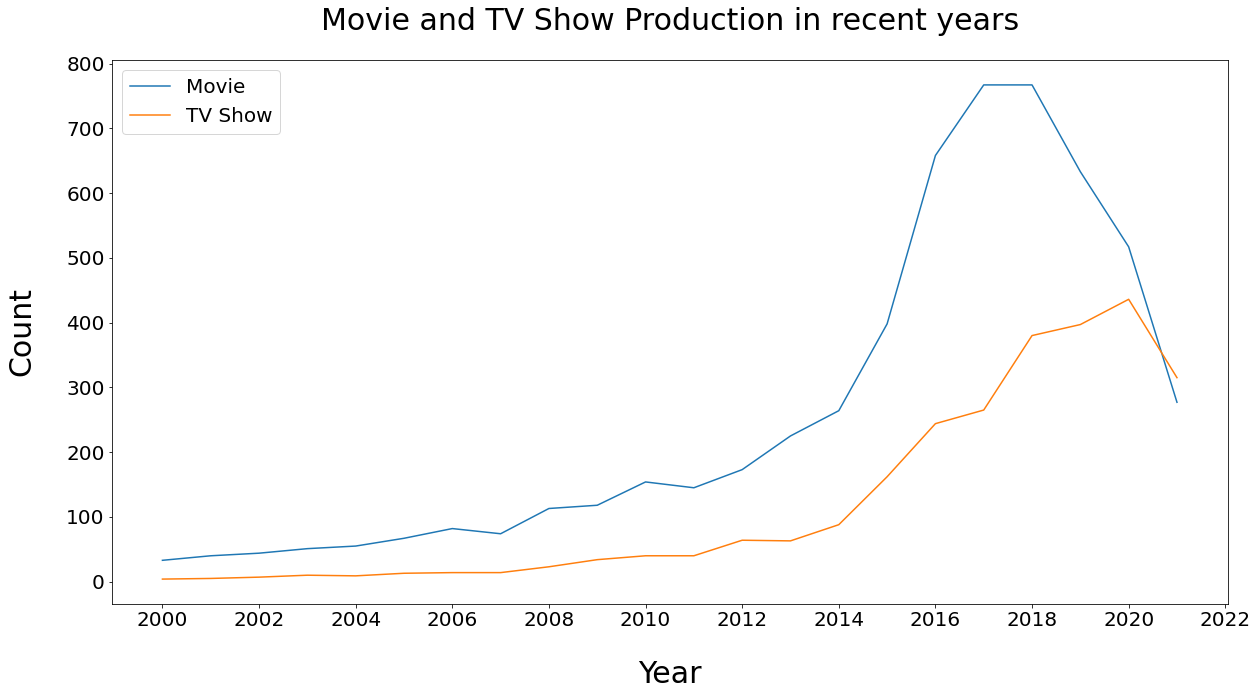

In [54]:
plt.figure(figsize=(20,10))
plt.title('Movie and TV Show Production in recent years',pad=30,fontsize=30)
plt.plot(movie_year,movie_count, label='Movie')
plt.plot(tv_year,tv_count, label='TV Show')
plt.legend(loc="upper left",fontsize=20)
plt.xlabel('Year',labelpad=30,fontsize=30)
plt.ylabel('Count',labelpad=30,fontsize=30)
plt.xticks(ticks = [x for x in range(2000,2023,2)],labels = [x for x in range(2000,2023,2)],fontsize=20)
plt.yticks(fontsize=20)
plt.show()